# Try to estimate the missing variance of altimetric measurement interpolating spectra (not relevant)

[8.67182174e-09 1.67329209e-09 5.81173335e-10 2.40303621e-10
 1.08192839e-10 5.12425830e-11 2.50993814e-11 1.25920889e-11
 6.43165575e-12 3.33120058e-12]


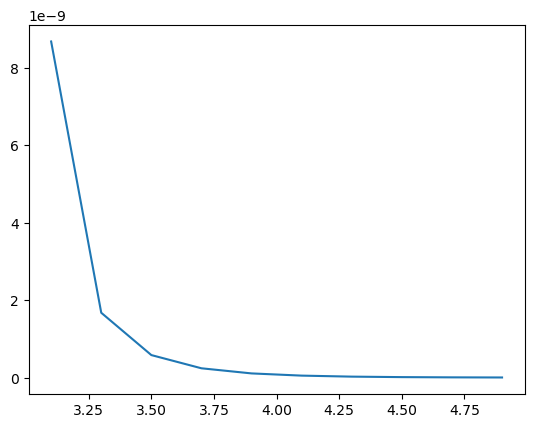

In [4]:
import numpy as np
import matplotlib.pyplot as plt

HFvarSSH = lambda E0, k0, kc, s : E0/(s-1)*(k0**s)/(kc**(s-1))
HFvargradSSH = lambda E0, k0, kc, s : E0/(s-3)*(k0**s)/(kc**(s-3))*(9.81**2)*(2*np.pi/1000)**2


E0 = 3e2# ref point
k0= 1e-3# ref point
kc=1/65 # low pass cut off used to remove alitmetric noise by low pass filter
s = np.arange(3.1, 5, 0.2) # SSH slope

varssh = HFvarSSH(E0, k0, kc, s)
varggrad = HFvargradSSH(E0, k0, kc, s) 

plt.plot(s, varggrad)
print(varggrad)

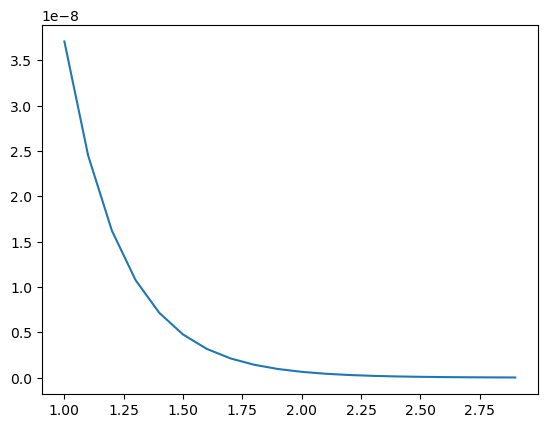

In [48]:
import numpy as np

HFvargradSSH_ = lambda E0, k0, kc,kmax, s : E0/(3-s)*(k0**s)*[kmax**(3-s)-kc**(3-s)]*(9.81**2)*(2*np.pi/1000)**2


E0 = 2# ref point
k0= 1e-3# ref point
kc=1/65 # low pass cut off used to remove alitmetric noise by low pass filter
kmax = 0.1

s=np.arange(1, 3, 0.1)
var = HFvargradSSH_(E0, k0, kc,kmax, s)

import matplotlib.pyplot as plt

plt.plot(s, var[0])
#plt.yscale('log')
#plt.grid()


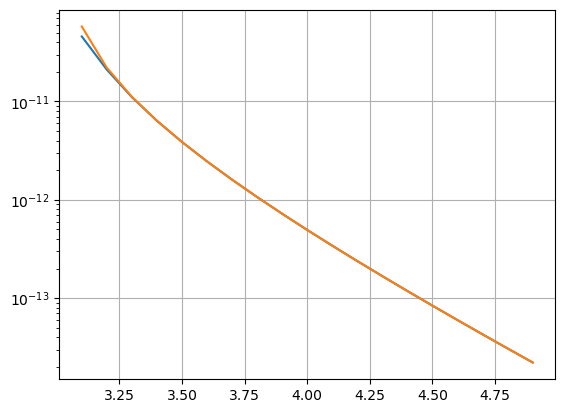

In [46]:
# Check convergence of both expression for s>3
import numpy as np

HFvargradSSH_ = lambda E0, k0, kc,kmax, s : E0/(3-s)*(k0**s)*[kmax**(3-s)-kc**(3-s)]*(9.81**2)*(2*np.pi/1000)**2


E0 = 2# ref point
k0= 1e-3# ref point
kc=1/65 # low pass cut off used to remove alitmetric noise by low pass filter
kmax = 1e5

s=np.arange(3.1, 5,0.1)
var = HFvargradSSH_(E0, k0, kc,kmax, s)
var0 = HFvargradSSH(E0, k0, kc, s)
import matplotlib.pyplot as plt

plt.plot(s, var[0])
plt.plot(s, var0)
plt.yscale('log')
plt.grid()


## Other estimation

$\langle grad SSH ^2 \rangle = \frac{e_i \times (\delta x)^2}{g^2}$



In [7]:
np.sqrt(6.5e-11*(65e3)**2/(9.81)**2)

0.05341964868903218